In [3]:
import os

import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

import thesis.config

In [34]:
use_tex = False
if (use_tex):
    thesis.config.use_tex()
else:
    thesis.config.use_inline()
config_file_path = "/users/wctaylor/wctaylor_thesis_code/config/example_config.json"
thesis.config.config_env(config_file_path)

In [36]:
KR_FILE_PPT = 0.015
KR_REAL_PPT = 0.3

# Change the label to match KR_REAL_PPT
labels = \
{
    "Bi210_1E-4mBqkg_events_per_kg_day_keV.txt": r"$^{210}$Bi ($1 \times 10^{-4}$ mBq/kg)",
    "det_surf_env_events_per_kg_day_keV.txt": "Environmental Backgrounds",
    "Kr85_0.015ppt_events_per_kg_day_keV.txt": r"$^{85}$Kr (0.3 ppt)",
    "Rn220_9.00E-05mBqkg_events_per_kg_day_keV.txt": r"$^{220}$Rn ($9.00 \times 10^{-5}$ mBq/kg)",
    "Rn222_1.81E-03mBqkg_events_per_kg_day_keV.txt": r"$^{222}$Rn ($1.81 \times 10^{-3}$ mBq/kg)",
    "solar_neutrinos_events_per_kg_day_keV.txt": "Solar Neutrinos",
    "Xe136_2nBB_events_per_kg_day_keV": r"$^{136}$Xe $2\nu\beta\beta$",
}

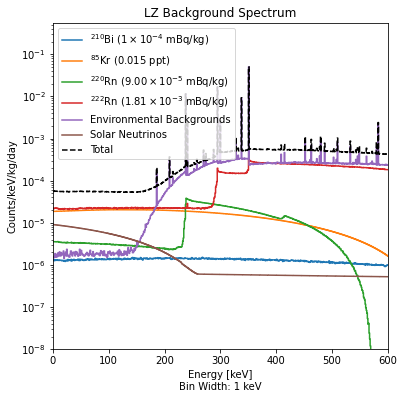

In [35]:
LOWER_BOUND_X = 0
UPPER_BOUND_X = 600
LOWER_BOUND_Y = 1e-8
FIG_DPI = 450
figure_dir = os.environ["FIGURE_DIR"]
figure_dir = f"{figure_dir}/activation/"

background_filepath = "/gpfs/data/rgaitske/wctaylor/er_bg_spectrum-master-data/data"
background_files = sorted(os.listdir(background_filepath))

fig, axis = plt.subplots(figsize=(6,6))
total = None
for filename in background_files:
    if filename in labels:
        data = np.loadtxt(f"{background_filepath}/{filename}")
        if ("Kr85" in filename):
            data[:,1] = data[:,1]*(KR_REAL_PPT)/(KR_FILE_PPT)
        axis.step(data[:,0], data[:,1],
                  label=f"{labels[filename]}")
        if total is None:
            total = np.zeros_like(data)
            total[:,0] = data[:,0]
        elif (np.shape(data)[0] > np.shape(total)[0]):
            new_total = np.zeros_like(data)
            new_total[:,0] = data[:,0]
            new_total[:,1] += total[:np.shape(total)[0],1]
            total = new_total[:,:]
        total[:np.shape(data)[0],1] += data[:,1]

bin_width = total[1,0] - total[0,0]
axis.step(total[:,0], total[:,1], 
          label="Total", color="k", linestyle="--")
axis.set_xlabel(f"Energy [keV]\n"
                f"Bin Width: {bin_width:.0f} keV")
axis.set_ylabel("Counts/keV/kg/day")
# axis.set_xscale("log")
axis.set_yscale("log")
axis.set_xlim([LOWER_BOUND_X, UPPER_BOUND_X])
axis.set_ylim(bottom=LOWER_BOUND_Y)
axis.legend(loc='upper left')
axis.set_title(f"LZ Background Spectrum")

if (use_tex):
    fig.savefig(f"{figure_dir}/lz_er_background.pdf",
                    dpi=FIG_DPI)
else:
    plt.show()